In [1]:
import uproot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['text.usetex'] = True

plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

sns.set_style("whitegrid")


In [2]:
df_z = {'df': uproot.open('./z_jet_files_jets.root')['tnjets'].arrays(library='pd'),				'color' : 'red', 	'label': 'Z jets'}
df_zmDT = {'df': uproot.open('./z_jet_files_jets_mDT0.04.root')['tnjets'].arrays(library='pd'),		'color' : 'orange', 'label': 'Z jets mDT'}
df_g = {'df': uproot.open('./glue_jet_files_jets.root')['tnjets'].arrays(library='pd'),				'color' : 'blue', 	'label': 'gluon jets'}
df_q = {'df': uproot.open('./quark_jet_files_jets.root')['tnjets'].arrays(library='pd'),			'color' : 'green', 	'label': 'quark jets'}

In [3]:
ddfs = [df_zmDT, df_z, df_g, df_q]
for i, ddf in enumerate(ddfs):
	df = ddf['df']
	ddf['df']['label'] = ddf['label']
	ddf['df_filtered'] = df.loc[(df['pt'] > 500) & (df['pt'] < 550) & (df['tau21']>0)]


dfall = pd.concat([ddfs[i]['df_filtered'] for i in range(4)], ignore_index=True)
dfall.describe(include='all')


,pt,eta,y,phi,mult,tag,lead_part_pid,tau21,label
count,3.901611e+06,3.901611e+06,3.901611e+06,3.901611e+06,3.901611e+06,3.901611e+06,3901611.0,3.901611e+06,3901611
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Z jets
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999268
mean,5.227465e+02,8.023882e-04,8.009844e-04,3.142067e+00,4.578928e+01,5.583180e+00,0.0,4.832315e-01,NaN
std,1.420396e+01,9.063677e-01,8.991904e-01,1.813748e+00,1.868409e+01,9.092484e+00,0.0,2.271722e-01,NaN
min,5.000000e+02,-1.791240e+00,-1.721678e+00,8.832085e-07,3.000000e+00,-5.000000e+00,0.0,3.841184e-03,NaN
25%,5.103166e+02,-7.387934e-01,-7.315526e-01,1.571409e+00,3.300000e+01,0.000000e+00,0.0,2.797623e-01,NaN
50%,5.216486e+02,1.479101e-03,1.464275e-03,3.143868e+00,4.300000e+01,0.000000e+00,0.0,4.798540e-01,NaN
75%,5.346111e+02,7.405518e-01,7.333477e-01,4.713717e+00,5.600000e+01,2.100000e+01,0.0,6.887656e-01,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(14.018787391890193, 0.5, 'Density')

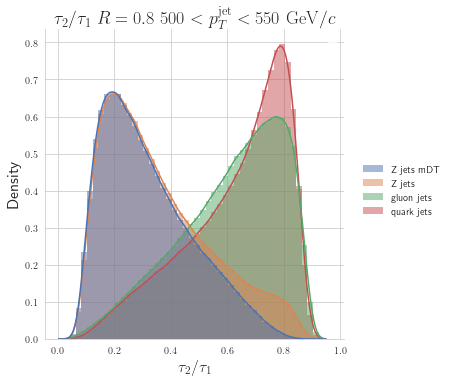

In [4]:
_p = sns.displot(data=dfall, x='tau21', hue='label', kind='hist',  kde=True, stat='density', binwidth=0.02, palette = 'deep')
plt.legend(prop={'size': 12}, title='')
_p._legend.set_title('')
# https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
plt.title(r'$\tau_{2}/\tau_{1}$ $R=0.8$ $500 < p_{T}^{\mathrm{jet}} < 550$ $\mathrm{GeV}/c$', fontsize=18)
plt.xlabel(r'$\tau_{2}/\tau_{1}$', fontsize=16)
plt.ylabel('Density', fontsize=16)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(14.018787391890193, 0.5, 'Density')

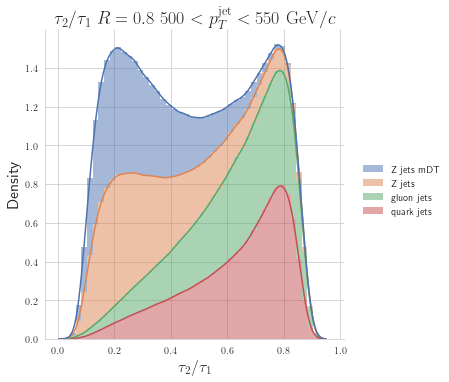

In [5]:
_p = sns.displot(data=dfall, x='tau21', hue='label', kind='hist',  kde=True, stat='density', binwidth=0.02, multiple="stack", palette = 'deep')
plt.legend(prop={'size': 12}, title='')
_p._legend.set_title('')
# https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
plt.title(r'$\tau_{2}/\tau_{1}$ $R=0.8$ $500 < p_{T}^{\mathrm{jet}} < 550$ $\mathrm{GeV}/c$', fontsize=18)
plt.xlabel(r'$\tau_{2}/\tau_{1}$', fontsize=16)
plt.ylabel('Density', fontsize=16)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(14.018787391890193, 0.5, 'Density')

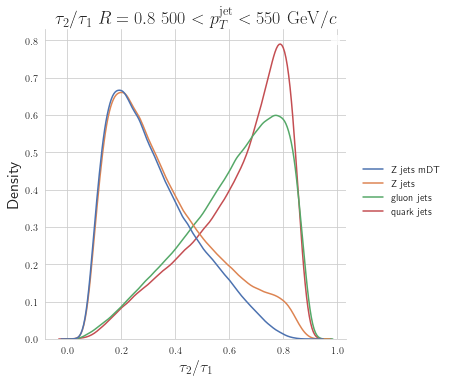

In [6]:
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'
_p = sns.displot(data=dfall, x='tau21', hue='label', kind='kde', palette = 'deep')
plt.legend(prop={'size': 12}, title='')
_p._legend.set_title('')
# https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
plt.title(r'$\tau_{2}/\tau_{1}$ $R=0.8$ $500 < p_{T}^{\mathrm{jet}} < 550$ $\mathrm{GeV}/c$', fontsize=18)
plt.xlabel(r'$\tau_{2}/\tau_{1}$', fontsize=16)
plt.ylabel('Density', fontsize=16)


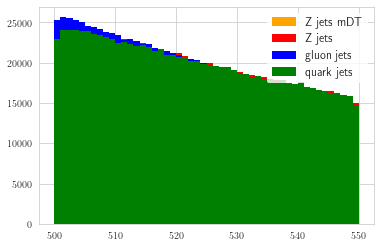

In [7]:
for i, ddf in enumerate(ddfs):
	df = ddf['df_filtered']
	hist = df['pt'].hist(color=ddf['color'], bins=50, label=ddf['label'])
plt.legend(prop={'size': 12})

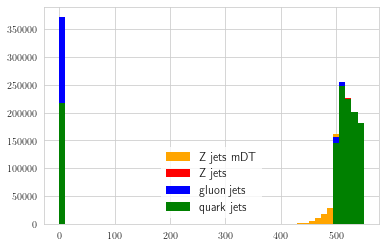

In [8]:
for i, ddf in enumerate(ddfs):
	df = ddf['df']
	hist = df['pt'].hist(color=ddf['color'], bins=50, label=ddf['label'])
plt.legend(prop={'size': 12})


/home/ploskon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ploskon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ploskon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

Text(0, 0.5, 'Density')

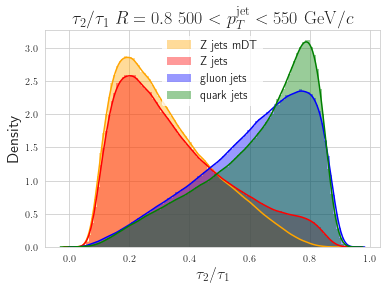

In [9]:
for i, ddf in enumerate(ddfs):
	df = ddf['df_filtered']
	sns.distplot(df['tau21'], kde=True, color=ddf['color'], bins=100, label=ddf['label'])
plt.legend(prop={'size': 12})
plt.title(r'$\tau_{2}/\tau_{1}$ $R=0.8$ $500 < p_{T}^{\mathrm{jet}} < 550$ $\mathrm{GeV}/c$', fontsize=18)
plt.xlabel(r'$\tau_{2}/\tau_{1}$', fontsize=16)
plt.ylabel('Density', fontsize=16)
